# KMeans Clustering

Importing necessary libraries

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons, make_circles

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("blend:blue,orange"))

Generating datasets

In [3]:
x_uniform: np.array = np.array([np.random.uniform(-1, 1, 1500), np.random.uniform(-1, 1, 1500)])
x_normal: np.array = np.array([
    np.concatenate([
        np.random.normal(0, .2, 500), 
        np.random.normal(1, .2, 500),
        np.random.normal(-0.7, .2, 500),
        np.random.normal(1, .2, 500)
    ]), 
    np.concatenate([
        np.random.normal(0, .2, 500), 
        np.random.normal(1, .2, 500),
        np.random.normal(-2, .2, 500),
        np.random.normal(0, .2, 500)
    ])])
x_circles = make_circles((500, 200), noise=.025)[0].T
x_moons = make_moons((500, 250), noise=.1)[0].T

data = [x_uniform, x_normal, x_circles, x_moons]

Making the plotting process easier

In [4]:
def plot(x: list[np.array], hue: list[np.array], k: int) -> None:
    fig, ax = plt.subplots(1, len(x), figsize=(16,4))
    for i, df in enumerate(x):
        sns.scatterplot(*df, hue=hue[i], palette = ["red", "blue", "green", "orange", "purple", "gray"][:k], ax=ax[i])
    fig.suptitle(f"Clustering with KMeans, k = {k}")
    plt.show()

Fitting the model and clustering

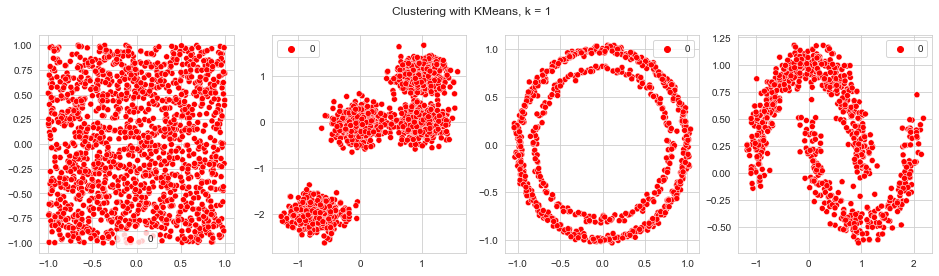

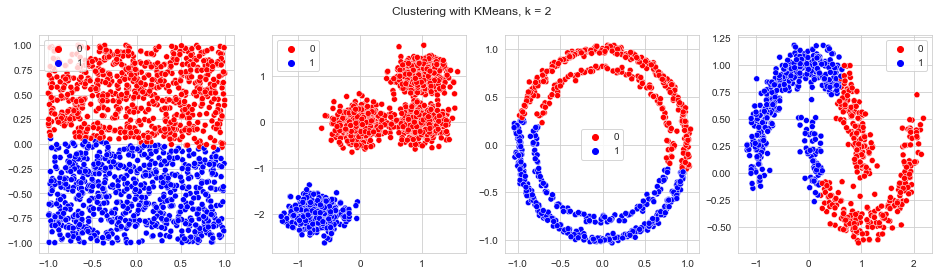

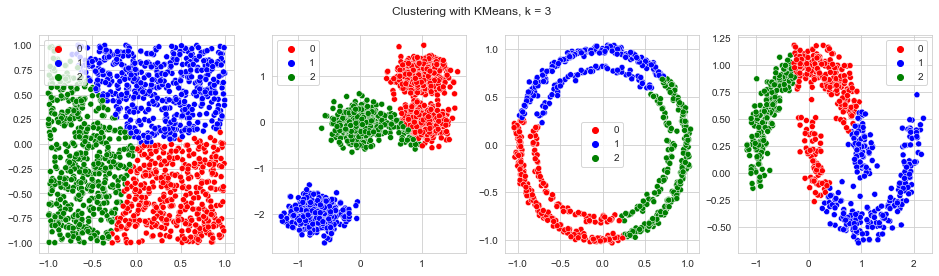

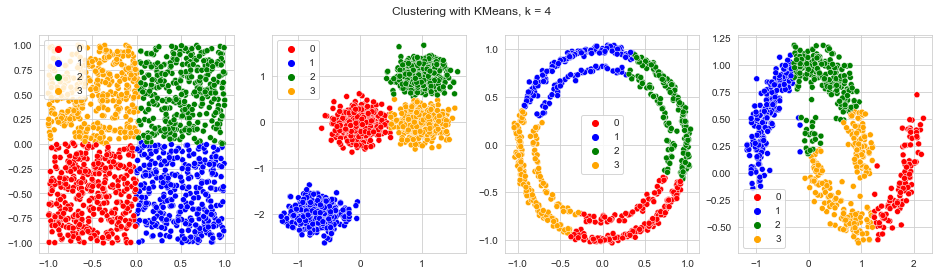

In [5]:
distortions = [[] for _ in data]

for k in range(1, 5):
    model: KMeans = KMeans(n_clusters=k)
    predictions = []
    
    for i, df in enumerate(data):
        predictions.append(model.fit_predict(df.T))
        distortions[i].append(model.inertia_)
        model = KMeans(n_clusters=k)
        
    plot(data, predictions, k)

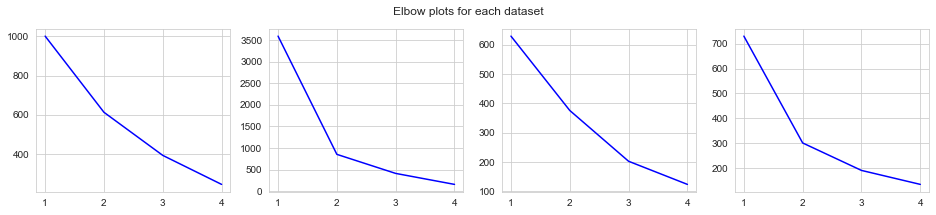

In [30]:
fig, ax = plt.subplots(1, len(data), figsize=(16, 3))
fig.suptitle("Elbow plots for each dataset")

for dataset, distortion in enumerate(distortions):
    sns.lineplot(*(np.array(list(enumerate(distortion))).T + 1), ax=ax[dataset])
    
plt.show()

# Conclusions

Stay away from KMeans if possible